In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('D:\\Major project\\Code\\hypothyroid.csv')
print(data)
data.head()

     age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0     41   F            f                  f                         f    f   
1     23   F            f                  f                         f    f   
2     46   M            f                  f                         f    f   
3     70   F            t                  f                         f    f   
4     70   F            f                  f                         f    f   
...   ..  ..          ...                ...                       ...  ...   
3765  30   F            f                  f                         f    f   
3766  68   F            f                  f                         f    f   
3767  74   F            f                  f                         f    f   
3768  72   M            f                  f                         f    f   
3769  64   F            f                  f                         f    f   

     pregnant thyroid_surgery I131_treatment query_

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [2]:
data.shape

(3770, 30)

In [3]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,...,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,3
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2479,3306,3720,3727,3623,3717,3717,3711,3537,...,3539,231,3384,386,3386,384,3770,3770,2199,3481


In [4]:
dict(data.dtypes)

{'age': dtype('O'),
 'sex': dtype('O'),
 'on_thyroxine': dtype('O'),
 'query_on_thyroxine': dtype('O'),
 'on_antithyroid_medication': dtype('O'),
 'sick': dtype('O'),
 'pregnant': dtype('O'),
 'thyroid_surgery': dtype('O'),
 'I131_treatment': dtype('O'),
 'query_hypothyroid': dtype('O'),
 'query_hyperthyroid': dtype('O'),
 'lithium': dtype('O'),
 'goitre': dtype('O'),
 'tumor': dtype('O'),
 'hypopituitary': dtype('O'),
 'psych': dtype('O'),
 'TSH_measured': dtype('O'),
 'TSH': dtype('O'),
 'T3_measured': dtype('O'),
 'T3': dtype('O'),
 'TT4_measured': dtype('O'),
 'TT4': dtype('O'),
 'T4U_measured': dtype('O'),
 'T4U': dtype('O'),
 'FTI_measured': dtype('O'),
 'FTI': dtype('O'),
 'TBG_measured': dtype('O'),
 'TBG': dtype('O'),
 'referral_source': dtype('O'),
 'Class': dtype('O')}

In [5]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [6]:
#let's drop some unnecessary columns
data = data.drop(['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'TSH_measured','hypopituitary','psych', 'T3_measured',  'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'TBG', 'referral_source'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3770 non-null   object
 1   sex              3770 non-null   object
 2   sick             3770 non-null   object
 3   pregnant         3770 non-null   object
 4   thyroid_surgery  3770 non-null   object
 5   goitre           3770 non-null   object
 6   tumor            3770 non-null   object
 7   TSH              3770 non-null   object
 8   T3               3770 non-null   object
 9   TT4              3770 non-null   object
 10  T4U              3770 non-null   object
 11  FTI              3770 non-null   object
 12  Class            3770 non-null   object
dtypes: object(13)
memory usage: 383.0+ KB


In [7]:
data.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid_surgery    0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Class              0
dtype: int64

In [8]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count != 0:
        print(column,data[column][data[column]=='?'].count())

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 386
FTI 384


In [9]:
#As we can see above the null values are not being detected directly because they are in the form of '?'
#So now replace the '?' values with numpy nan
for column in data.columns:
    count=data[column][data[column]== '?'].count()
    if count!=0:
        data[column]=data[column].replace('?',np.nan)

In [10]:
#Now we see that null values are replaced by nan values
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count == 0:
        print(column,data[column][data[column]=='?'].count())

age 0
sex 0
sick 0
pregnant 0
thyroid_surgery 0
goitre 0
tumor 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
Class 0


In [11]:
# Now replace the '?' values with numpy nan
for column in data.columns:
    count=data[column][data[column]== '?'].count()
    if count!=0:
        data[column]=data[column].replace('?',np.nan)
data

,age,sex,sick,pregnant,thyroid_surgery,goitre,tumor,TSH,T3,TT4,T4U,FTI,Class
0,41,F,f,f,f,f,f,1.3,2.5,125,1.14,109,negative
1,23,F,f,f,f,f,f,4.1,2,102,NaN,NaN,negative
2,46,M,f,f,f,f,f,0.98,NaN,109,0.91,120,negative
3,70,F,f,f,f,f,f,0.16,1.9,175,NaN,NaN,negative
4,70,F,f,f,f,f,f,0.72,1.2,61,0.87,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,30,F,f,f,f,f,t,NaN,NaN,NaN,NaN,NaN,negative
3766,68,F,f,f,f,f,f,1,2.1,124,1.08,114,negative
3767,74,F,f,f,f,f,f,5.1,1.8,112,1.07,105,negative
3768,72,M,f,f,f,f,f,0.7,2,82,0.94,87,negative


In [12]:
#Now we can see that no columns have '?' values in them
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count == 0:
        print(column,data[column][data[column]=='?'].count())

age 0
sex 0
sick 0
pregnant 0
thyroid_surgery 0
goitre 0
tumor 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
Class 0


In [13]:
#  Unique Values in all columns
for column in data.columns:
    print(column,(data[column].unique()))

age ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
sex ['F' 'M' nan]
sick ['f' 't']
pregnant ['f' 't']
thyroid_surgery ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.5' '0.5' '1.7' '7.3' '1.8' '0.26' '45' '5.4' '0.99' '0.25'
 '0.92' '0.15' '0.64' '1' '0.4' '2' '2.6' '14.8' '15' '19' '0.02' '3'
 '2.9' '3.2' '9' '1.6' '4.3' '0.005' '0.31' '0.61' '0.05' '7.8' '160'
 '0.025' '1.4' '0.01' '8.8' '151' '0.04' '3.9' '9

In [14]:
#Handling Missing values by replacing them with the median values
data['age'].fillna((data['age'].median()), inplace = True)
data['TSH'].fillna((data['TSH'].median()), inplace = True)
data['T3'].fillna((data['T3'].median()), inplace = True)
data['TT4'].fillna((data['TT4'].median()), inplace = True)
data['T4U'].fillna((data['T4U'].median()), inplace = True)
data['FTI'].fillna((data['FTI'].median()), inplace = True)

In [15]:
#To handle nominal categorical values we perform one hot encoding on them
sex = data[["sex"]]
print(sex)
sex = pd.get_dummies(sex, drop_first= True)
print(sex)

     sex
0      F
1      F
2      M
3      F
4      F
...   ..
3765   F
3766   F
3767   F
3768   M
3769   F

[3770 rows x 1 columns]
      sex_M
0         0
1         0
2         1
3         0
4         0
...     ...
3765      0
3766      0
3767      0
3768      1
3769      0

[3770 rows x 1 columns]


In [16]:
sick = data[["sick"]]
print(sick)
sick = pd.get_dummies(sick, drop_first= True)
print(sick)

     sick
0       f
1       f
2       f
3       f
4       f
...   ...
3765    f
3766    f
3767    f
3768    f
3769    f

[3770 rows x 1 columns]
      sick_t
0          0
1          0
2          0
3          0
4          0
...      ...
3765       0
3766       0
3767       0
3768       0
3769       0

[3770 rows x 1 columns]


In [17]:
pregnant = data[["pregnant"]]
print(pregnant)
pregnant = pd.get_dummies(pregnant, drop_first= True)
print(pregnant)

     pregnant
0           f
1           f
2           f
3           f
4           f
...       ...
3765        f
3766        f
3767        f
3768        f
3769        f

[3770 rows x 1 columns]
      pregnant_t
0              0
1              0
2              0
3              0
4              0
...          ...
3765           0
3766           0
3767           0
3768           0
3769           0

[3770 rows x 1 columns]


In [18]:
thyroid_surgery = data[["thyroid_surgery"]]
print(thyroid_surgery)
thyroid_surgery = pd.get_dummies(thyroid_surgery, drop_first= True)
print(thyroid_surgery)

     thyroid_surgery
0                  f
1                  f
2                  f
3                  f
4                  f
...              ...
3765               f
3766               f
3767               f
3768               f
3769               f

[3770 rows x 1 columns]
      thyroid_surgery_t
0                     0
1                     0
2                     0
3                     0
4                     0
...                 ...
3765                  0
3766                  0
3767                  0
3768                  0
3769                  0

[3770 rows x 1 columns]


In [19]:
goitre = data[["goitre"]]
print(goitre)
goitre = pd.get_dummies(goitre, drop_first= True)
print(goitre)

     goitre
0         f
1         f
2         f
3         f
4         f
...     ...
3765      f
3766      f
3767      f
3768      f
3769      f

[3770 rows x 1 columns]
      goitre_t
0            0
1            0
2            0
3            0
4            0
...        ...
3765         0
3766         0
3767         0
3768         0
3769         0

[3770 rows x 1 columns]


In [20]:
tumor = data[["tumor"]]
print(tumor)
tumor = pd.get_dummies(tumor, drop_first= True)
print(tumor)

     tumor
0        f
1        f
2        f
3        f
4        f
...    ...
3765     t
3766     f
3767     f
3768     f
3769     f

[3770 rows x 1 columns]
      tumor_t
0           0
1           0
2           0
3           0
4           0
...       ...
3765        1
3766        0
3767        0
3768        0
3769        0

[3770 rows x 1 columns]


In [21]:
#Now concating all these values
df = pd.concat([data,sex, sick, pregnant, thyroid_surgery, goitre, tumor], axis = 1)

In [22]:
df.columns

Index(['age', 'sex', 'sick', 'pregnant', 'thyroid_surgery', 'goitre', 'tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Class', 'sex_M', 'sick_t',
       'pregnant_t', 'thyroid_surgery_t', 'goitre_t', 'tumor_t'],
      dtype='object')

In [23]:
#Now dropping the old columns with nominal values
df.drop(['sex', 'sick', 'pregnant', 'thyroid_surgery', 'goitre', 'tumor'], axis = 1, inplace = True)

In [24]:
#Now we can see there are no null values or missing values
df.isnull().sum()

age                  0
TSH                  0
T3                   0
TT4                  0
T4U                  0
FTI                  0
Class                0
sex_M                0
sick_t               0
pregnant_t           0
thyroid_surgery_t    0
goitre_t             0
tumor_t              0
dtype: int64

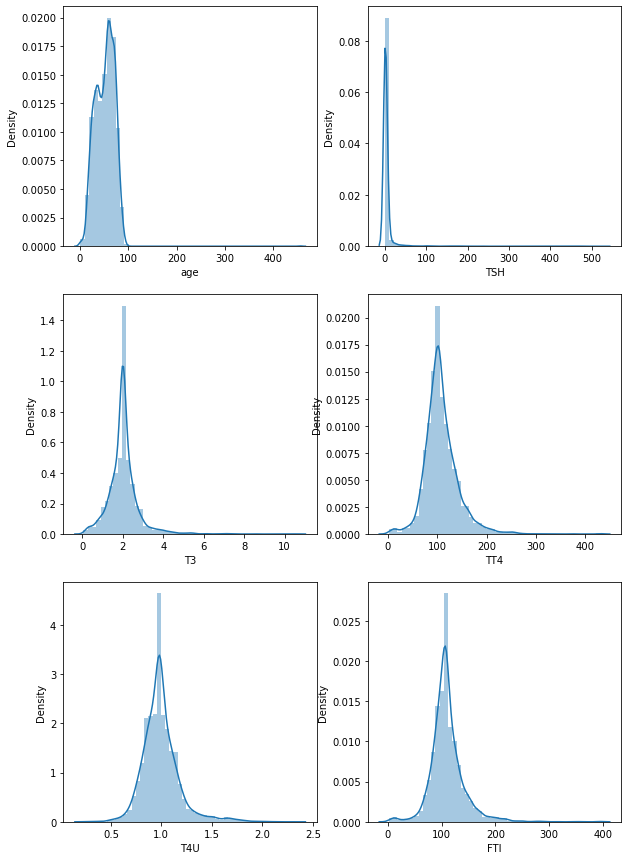

In [25]:
# Let's check the distribution for our continuous data in the dataset.
columns = ['age','TSH','T3','TT4','T4U','FTI']
plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1
for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [26]:
X = df.drop(['Class'], 1)
Y = df['Class']
cols = np.array(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_M', 'sick_t', 'pregnant_t', 'thyroid_surgery_t', 'goitre_t', 'tumor_t'])
li = []

In [27]:
#Now we perform feature selection techniques on the data
#Feature importance using Extra Trees Classifier
print('\nFeature Importance:')
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators = 50, random_state = 0)
model.fit(X, Y)
print('Model feature importance:', end = ' ')
for val in model.feature_importances_:
    print('%.3f' % val, end = ' ')
sort = np.argsort(model.feature_importances_)
print('\nFeatures are:', end = ' ')
for i in range(len(model.feature_importances_) - 1, len(model.feature_importances_) - 6, -1):
    print(cols[sort][i], end = ' ')
print('\n')


Feature Importance:
Model feature importance: 0.062 0.512 0.067 0.121 0.062 0.154 0.009 0.004 0.001 0.006 0.001 0.003 
Features are: TSH FTI TT4 T3 T4U 



In [28]:
#Now we select features from the dataset
df = df.drop(['sex_M', 'sick_t', 'pregnant_t', 'thyroid_surgery_t', 'goitre_t', 'tumor_t', 'age'], axis = 1)
df

,TSH,T3,TT4,T4U,FTI,Class
0,1.3,2.5,125,1.14,109,negative
1,4.1,2,102,0.98,107.0,negative
2,0.98,2.0,109,0.91,120,negative
3,0.16,1.9,175,0.98,107.0,negative
4,0.72,1.2,61,0.87,70,negative
...,...,...,...,...,...,...
3765,1.4,2.0,103.0,0.98,107.0,negative
3766,1,2.1,124,1.08,114,negative
3767,5.1,1.8,112,1.07,105,negative
3768,0.7,2,82,0.94,87,negative


In [29]:
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
df['Class']=lblEn.fit_transform(df['Class'])

<AxesSubplot:xlabel='Class', ylabel='count'>

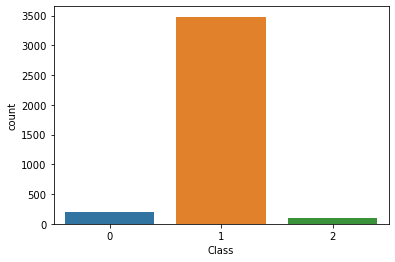

In [30]:
#Now we make a count plot for the classes in the dataset
sns.countplot(df['Class'])

In [31]:
n = len(df)
print('Total size of the dataset', n)
n1 = len(data[data['Class'] == 'primary_hypothyroid'])
print('No of primary hypothyroid in Dataset:', n1)
n2 = len(data[data['Class'] == 'compensated_hypothyroid'])
print("No of compensated hypothyroid in Dataset:",n2)
n3 = len(data[data['Class'] == 'negative'])
print("No of negative in Dataset:",n3)
n3 = len(data[data['Class'] == 'negative'])

Total size of the dataset 3770
No of primary hypothyroid in Dataset: 95
No of compensated hypothyroid in Dataset: 194
No of negative in Dataset: 3481


Total number of samples: 10443
No of primary hypothyroid samples after oversampling: 3481
No of compensated hypothyroid samples after oversampling: 3481
No of negative samples after oversampling: 3481


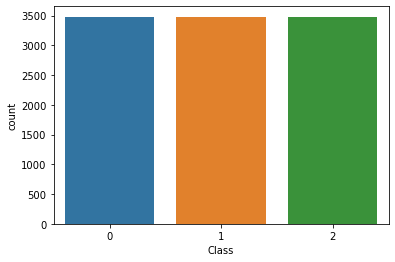

In [32]:
#As we can see that the dataset is highly imbalanced, we will perfrom SMOTE on the dataset
from imblearn.over_sampling import BorderlineSMOTE
X = df.drop(['Class'], axis = True)
Y = df['Class']
sm = BorderlineSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, Y)
sns.countplot(y_res)
print('Total number of samples:',len(y_res))
series = y_res.value_counts()
n1 = series[2]
print('No of primary hypothyroid samples after oversampling:', n1)
n2 = series[0]
print('No of compensated hypothyroid samples after oversampling:', n2)
n3 = series[1]
print('No of negative samples after oversampling:', n3)

In [33]:
#Now let's build our models for this
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res, y_res, test_size=0.3, random_state = 0)

In [34]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
print('Decision Tree:')
model_dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)
print('Train score: %.3f' % (model_dtc.score(X_train, y_train) * 100))
print('Test score: %.3f' %  (model_dtc.score(X_test, y_test) * 100))
print('Accuracy score: %.3f' % (accuracy_score(y_test, y_pred) * 100))
print('Precision score: %.3f' % (precision_score(y_true = y_test, y_pred = y_pred, average = 'macro') * 100))
print('Recall score: %.3f' % (recall_score(y_true = y_test, y_pred = y_pred, average = 'macro') * 100))
print('F1 score: %.3f' % (f1_score(y_true = y_test, y_pred = y_pred, average = 'macro') * 100))

Decision Tree:
Confusion matrix:
 [[1057   16    1]
 [   9 1008    0]
 [   6    1 1035]]
Train score: 100.000
Test score: 98.947
Accuracy score: 98.947
Precision score: 98.949
Recall score: 98.953
F1 score: 98.950


In [35]:
print('Classification report:\n', classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1074
           1       0.98      0.99      0.99      1017
           2       1.00      0.99      1.00      1042

    accuracy                           0.99      3133
   macro avg       0.99      0.99      0.99      3133
weighted avg       0.99      0.99      0.99      3133



<AxesSubplot:>

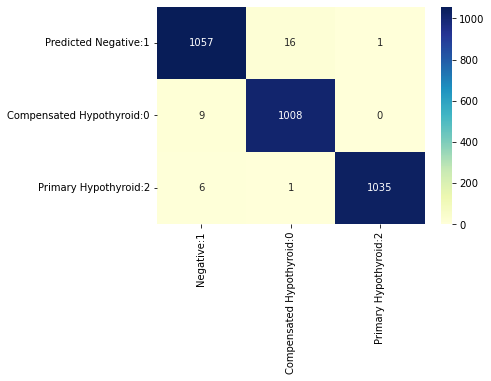

In [36]:
#Making a heat map
cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Compensated Hypothyroid:0', 'Primary Hypothyroid:2'], index=['Predicted Negative:1', 'Compensated Hypothyroid:0', 'Primary Hypothyroid:2'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [37]:
#Now we go for cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = model_dtc, X = X_res, y = y_res, cv = 5)
print('Accuracies after cross validation:', accuracies)
print('Mean:', accuracies.mean())

Accuracies after cross validation: [0.94877932 0.98946865 0.99234083 0.9947318  0.98994253]
Mean: 0.9830526255940164


In [38]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
print('Random Forest:')
model_rf = RandomForestClassifier(criterion = 'entropy', random_state = 0)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)
print('Train score: %.3f' % (model_rf.score(X_train, y_train) * 100))
print('Test score: %.3f' %  (model_rf.score(X_test, y_test) * 100))
print('Accuracy score: %.3f' % (accuracy_score(y_test, y_pred) * 100))
print('Precision score: %.3f' % (precision_score(y_true = y_test, y_pred = y_pred, average = 'macro') * 100))
print('Recall score: %.3f' % (recall_score(y_true = y_test, y_pred = y_pred, average = 'macro') * 100))
print('F1 score: %.3f' % (f1_score(y_true = y_test, y_pred = y_pred, average = 'macro') * 100))

Random Forest:
Confusion matrix:
 [[1071    0    3]
 [  13 1004    0]
 [   9    0 1033]]
Train score: 100.000
Test score: 99.202
Accuracy score: 99.202
Precision score: 99.233
Recall score: 99.193
F1 score: 99.209


In [39]:
print('Classification report:\n', classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1074
           1       1.00      0.99      0.99      1017
           2       1.00      0.99      0.99      1042

    accuracy                           0.99      3133
   macro avg       0.99      0.99      0.99      3133
weighted avg       0.99      0.99      0.99      3133



<AxesSubplot:>

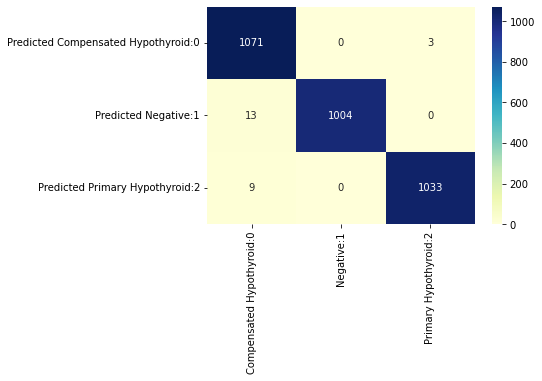

In [40]:
#Making a heat map
cm_matrix = pd.DataFrame(data=cm, columns=['Compensated Hypothyroid:0', 'Negative:1', 'Primary Hypothyroid:2'], index=['Predicted Compensated Hypothyroid:0', 'Predicted Negative:1', 'Predicted Primary Hypothyroid:2'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [41]:
#Now we go for cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = model_rf, X = X_res, y = y_res, cv = 5)
print('Accuracies after cross validation:', accuracies)
print('Mean: %.3f' % (accuracies.mean() * 100))

Accuracies after cross validation: [0.96409765 0.99138344 0.99377693 0.99616858 0.99137931]
Mean: 98.736


In [42]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout
from keras import Sequential
from keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf

In [43]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_res= sc.fit_transform(X_res)
X_res

array([[-0.53685149,  1.1047255 ,  1.07978724,  0.60935901,  0.58907967],
       [-0.40187318,  0.35066525,  0.38787777, -0.23957825,  0.52256307],
       [-0.55227758,  0.35066525,  0.59845891, -0.6109883 ,  0.95492099],
       ...,
       [-0.2509748 , -0.64132305, -1.01585964, -0.54000212, -1.0529922 ],
       [ 0.1017456 ,  0.06052718, -1.56257534, -0.98441885, -1.56724493],
       [ 0.01723502,  0.41279625, -0.44915076,  1.77823636, -1.23427185]])

In [44]:
tf.random.set_seed(3)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 0)

In [45]:
#ANN
ann = Sequential([
  Dense(32, activation = 'relu'),
  Dropout(0.3),
  Dense(16, activation = 'relu'),
  Dense(3, activation = 'softmax')                          
])

ann.compile(
    optimizer = 'adam',
    loss = SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [46]:
ann.fit(X_train, y_train, epochs = 50, batch_size = 10)

Epoch 1/50
731/731 [==============================] - 2s 1ms/step - loss: 0.5872 - accuracy: 0.7148
Epoch 2/50
731/731 [==============================] - 1s 2ms/step - loss: 0.3198 - accuracy: 0.8899
Epoch 3/50
731/731 [==============================] - 1s 2ms/step - loss: 0.2114 - accuracy: 0.9390
Epoch 4/50
731/731 [==============================] - 1s 1ms/step - loss: 0.1666 - accuracy: 0.9566
Epoch 5/50
731/731 [==============================] - 1s 2ms/step - loss: 0.1426 - accuracy: 0.9643
Epoch 6/50
731/731 [==============================] - 1s 1ms/step - loss: 0.1226 - accuracy: 0.9700
Epoch 7/50
731/731 [==============================] - 1s 1ms/step - loss: 0.1155 - accuracy: 0.9687
Epoch 8/50
731/731 [==============================] - 2s 2ms/step - loss: 0.1038 - accuracy: 0.9731
Epoch 9/50
731/731 [==============================] - 1s 2ms/step - loss: 0.0993 - accuracy: 0.9741
Epoch 10/50
731/731 [==============================] - 2s 2ms/step - loss: 0.0961 - accuracy: 0.9763

In [47]:
y_pred = ann.predict(X_test)
ann.evaluate(X_test, y_test)
cat_pred = [np.argmax(ele) for ele in y_pred]
#cat_test = [np.argmax(ele) for ele in y_test]
print('Classification report:\n', classification_report(y_test, cat_pred))

98/98 [==============================] - 0s 1ms/step - loss: 0.0439 - accuracy: 0.9901
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1074
           1       1.00      0.98      0.99      1017
           2       0.99      0.99      0.99      1042

    accuracy                           0.99      3133
   macro avg       0.99      0.99      0.99      3133
weighted avg       0.99      0.99      0.99      3133



Confusion matrix:
 tf.Tensor(
[[1065    0    9]
 [  13 1001    3]
 [   6    0 1036]], shape=(3, 3), dtype=int32)


<AxesSubplot:>

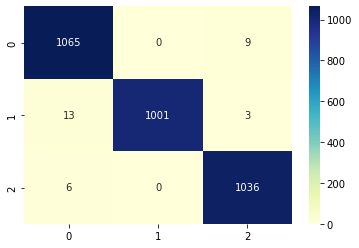

In [48]:
#Making a heat map
from tensorflow.math import confusion_matrix
cm = confusion_matrix(y_test, cat_pred)
print('Confusion matrix:\n', cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [49]:
def keras_model():
    model = Sequential()
    model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax'))
    model.compile(optimizer = 'adam', loss = SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
    return model

In [50]:
ann = KerasClassifier(build_fn = keras_model, epochs = 50, batch_size = 10)
acc = cross_val_score(estimator = ann, X = X_train, y = y_train, cv = 5)

Epoch 1/50
585/585 [==============================] - 3s 2ms/step - loss: 0.6677 - accuracy: 0.6919
Epoch 2/50
585/585 [==============================] - 1s 2ms/step - loss: 0.3421 - accuracy: 0.8794
Epoch 3/50
585/585 [==============================] - 1s 2ms/step - loss: 0.2295 - accuracy: 0.9355
Epoch 4/50
585/585 [==============================] - 1s 2ms/step - loss: 0.1768 - accuracy: 0.9538
Epoch 5/50
585/585 [==============================] - 2s 3ms/step - loss: 0.1498 - accuracy: 0.9600
Epoch 6/50
585/585 [==============================] - 1s 2ms/step - loss: 0.1391 - accuracy: 0.9629
Epoch 7/50
585/585 [==============================] - 1s 2ms/step - loss: 0.1311 - accuracy: 0.9677
Epoch 8/50
585/585 [==============================] - 1s 2ms/step - loss: 0.1209 - accuracy: 0.9699
Epoch 9/50
585/585 [==============================] - 1s 2ms/step - loss: 0.1108 - accuracy: 0.9723
Epoch 10/50
585/585 [==============================] - 1s 3ms/step - loss: 0.1050 - accuracy: 0.9738

585/585 [==============================] - 2s 3ms/step - loss: 0.0676 - accuracy: 0.9839
Epoch 32/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0667 - accuracy: 0.9850
Epoch 33/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0670 - accuracy: 0.9827
Epoch 34/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0629 - accuracy: 0.9851
Epoch 35/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0645 - accuracy: 0.9848
Epoch 36/50
585/585 [==============================] - 2s 3ms/step - loss: 0.0622 - accuracy: 0.9846
Epoch 37/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0651 - accuracy: 0.9850
Epoch 38/50
585/585 [==============================] - 2s 3ms/step - loss: 0.0623 - accuracy: 0.9853
Epoch 39/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0633 - accuracy: 0.9841
Epoch 40/50
585/585 [==============================] - 2s 3ms/step - loss: 0.0630 - accuracy: 0.9848
Ep

585/585 [==============================] - 1s 2ms/step - loss: 0.1006 - accuracy: 0.9730
Epoch 11/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0943 - accuracy: 0.9752
Epoch 12/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9778
Epoch 13/50
585/585 [==============================] - 2s 3ms/step - loss: 0.0886 - accuracy: 0.9767
Epoch 14/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0874 - accuracy: 0.9761
Epoch 15/50
585/585 [==============================] - 1s 3ms/step - loss: 0.0843 - accuracy: 0.9788
Epoch 16/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9783
Epoch 17/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9786
Epoch 18/50
585/585 [==============================] - 2s 3ms/step - loss: 0.0788 - accuracy: 0.9773
Epoch 19/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0765 - accuracy: 0.9807
Ep

585/585 [==============================] - 1s 2ms/step - loss: 0.0510 - accuracy: 0.9872
Epoch 41/50
585/585 [==============================] - 2s 3ms/step - loss: 0.0546 - accuracy: 0.9848
Epoch 42/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0520 - accuracy: 0.9865
Epoch 43/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0494 - accuracy: 0.9872
Epoch 44/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0523 - accuracy: 0.9853
Epoch 45/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0512 - accuracy: 0.9868
Epoch 46/50
585/585 [==============================] - 2s 3ms/step - loss: 0.0516 - accuracy: 0.9867
Epoch 47/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0516 - accuracy: 0.9868
Epoch 48/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0501 - accuracy: 0.9867
Epoch 49/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0510 - accuracy: 0.9863
Ep

In [51]:
print('Accuracies after cross validation:', acc)
print('Mean:', acc.mean())

Accuracies after cross validation: [0.99179208 0.98905611 0.98495209 0.9870041  0.98290014]
Mean: 0.9871409058570861
